In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [55]:
# Data manipulation and processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# Initializing Plotly in notebook mode
init_notebook_mode(connected=True)

# Machine Learning models and preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# Preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures,
    KBinsDiscretizer,
    LabelEncoder,
    label_binarize,
    MinMaxScaler
)
from sklearn.impute import SimpleImputer

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
    median_absolute_error,
)

# Statistical analysis
from scipy.stats import mode, zscore, skew

# Model validation and optimization
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)

# Dimensionality reduction
from sklearn.decomposition import PCA

# Plotting utilities
from matplotlib.patches import ConnectionPatch


In [4]:
df_train = pd.read_csv('dataset.csv')


Review the data

In [5]:
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [73]:
df_train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Enrollment_evaluation_interaction_2nd_sem,Gender_marital_interaction,Tuition_scholarship_interaction,Application_mode_x_Application_order,Course_x_Curricular_units_1st_sem_enrolled,Daytime_evening_attendance_x_Age_at_enrollment,Displaced_x_Curricular_units_1st_sem_approved,Scholarship_holder_x_Tuition_fees_up_to_date,Curricular_units_1st_sem_approved_x_Curricular_units_2nd_sem_approved,Unemployment_rate_x_Inflation_rate
count,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.00000,3537.0,3537.000000,3537.000000,3537.000000,...,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000,3537.000000
mean,1.077184,6.451795,1.656206,9.951088,0.910093,2.21261,1.0,12.088493,16.316370,6.878428,...,48.444727,0.385355,0.253322,9.399774,60.672604,19.280181,2.626520,0.253322,24.459146,14.075776
std,0.266921,5.222862,1.123327,4.264201,0.286088,3.52079,0.0,8.977998,11.053231,2.900096,...,27.135654,0.548487,0.434975,9.192215,29.874989,7.709798,2.942782,0.434975,20.524778,17.110253
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.0,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.520000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.00000,1.0,2.000000,3.000000,5.000000,...,36.000000,0.000000,0.000000,1.000000,35.000000,18.000000,0.000000,0.000000,6.000000,4.860000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.00000,1.0,13.000000,14.000000,6.000000,...,48.000000,0.000000,0.000000,8.000000,60.000000,19.000000,0.000000,0.000000,25.000000,12.460000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.00000,1.0,22.000000,27.000000,10.000000,...,64.000000,1.000000,1.000000,14.000000,85.000000,21.000000,6.000000,1.000000,36.000000,19.760000
max,2.000000,17.000000,5.000000,17.000000,1.000000,14.00000,1.0,29.000000,34.000000,19.000000,...,216.000000,2.000000,1.000000,70.000000,221.000000,46.000000,12.000000,1.000000,144.000000,46.990000


In [74]:
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Exploratory Data Analysis

In [75]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=column, data=df_train)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

### Class Imbalance

The dataset exhibits a class imbalance, with a significantly higher number of graduates compared to dropouts and enrolled students. This imbalance can bias predictive models towards the majority class (graduates), potentially leading to lower accuracy for minority classes.

### Strategies to Address Imbalance

To address this imbalance, **SMOTE (Synthetic Minority Oversampling Technique)** was applied. SMOTE generates synthetic samples for underrepresented classes by interpolating between existing data points, enhancing diversity within the dataset without relying solely on duplication. This approach aims to balance the classes, reducing overfitting to the majority class and improving the model's ability to generalize across all categories.

- **Resampling with SMOTE:** By creating synthetic samples for minority classes, SMOTE ensures better representation in the dataset.  
- **Class Weights Adjustment:** This technique, when combined with SMOTE, amplifies the model’s focus on minority classes.  
- **Specialized Algorithms:** Algorithms designed for imbalanced datasets, such as ensemble methods, complement SMOTE for improved predictions.

### Focus Areas for Analysis

- **Graduates:** Understanding the factors contributing to graduation success enables the replication of effective strategies across other groups.  
- **Dropouts:** Analyzing this group provides critical insights into the causes of attrition, guiding interventions to mitigate dropouts.  
- **Enrolled Students:** Continuous monitoring supports proactive measures to help enrolled students stay on track for graduation.

### SMOTE’s Impact on Our Analysis

Using SMOTE improved the dataset’s class balance, allowing models to better capture patterns in minority classes like dropouts and enrolled students. However, it’s important to acknowledge that synthetic samples can introduce slight noise or overlap in feature space, which may challenge algorithms that rely on clear linear separability, such as Perceptron and SGD. Despite these limitations, SMOTE proved invaluable in enhancing fairness and robustness, particularly for models like Random Forests and Logistic Regression, which showed improved performance and interpretability when applied to the resampled dataset.

The pair plot reveals significant insights into the relationship between features and student outcomes. Age at enrollment shows that dropouts span a broader age range, while graduates and enrolled students are typically younger, suggesting age influences academic success. Grades in Curricular units 1st and 2nd sem display a clear distinction, with graduates achieving consistently higher scores, while dropouts cluster around lower grades, particularly in the first semester. Enrolled students exhibit overlapping characteristics with both groups, indicating a transitional or uncertain outcome. These patterns underscore the critical role of academic performance and age in predicting dropouts, highlighting the need for targeted interventions and the value of these features in building effective classification models.

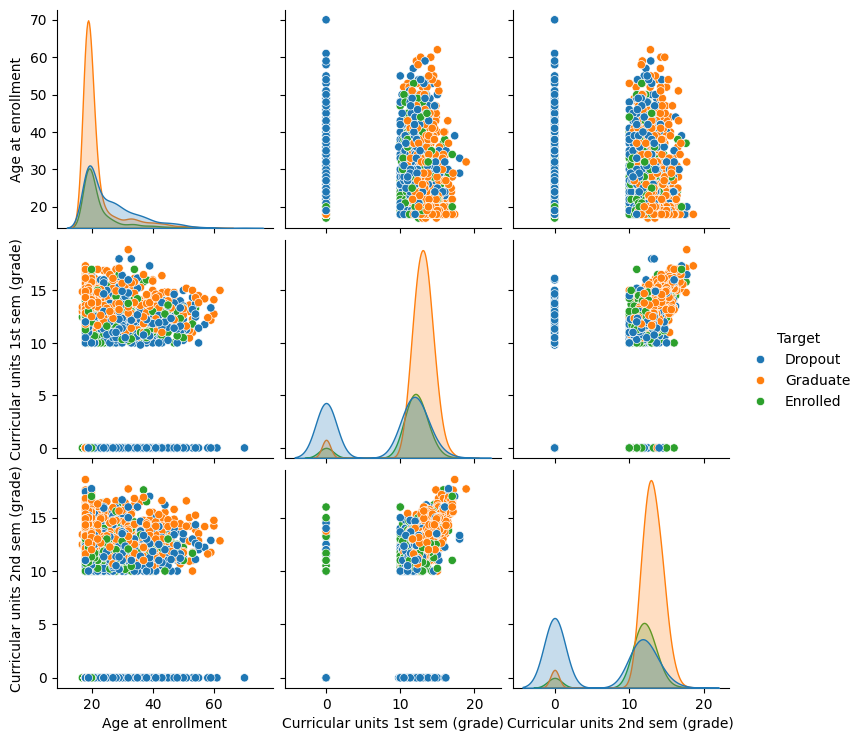

In [9]:
selected_features = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Target']
sns.pairplot(df_train[selected_features], hue='Target')
plt.show()

<table border="1" cellpadding="8">
  <tr>
    <th>Outcome</th>
    <th>Observation</th>
  </tr>
  <tr>
    <td>Graduates</td>
    <td>Points with high admission grades tend to also have higher grades in the first semester, indicating a positive correlation between admission grades and first semester performance.</td>
  </tr>
  <tr>
    <td>Dropouts</td>
    <td>Points tend to cluster at lower grades in the first semester or have zero grades, which may indicate difficulties in the curriculum or other factors leading to dropout.</td>
  </tr>
  <tr>
    <td>Enrolled</td>
    <td>These points are spread out but tend to be in the mid-range of grades, indicating that these students are still progressing but may not have exceptionally high grades.</td>
  </tr>
</table>


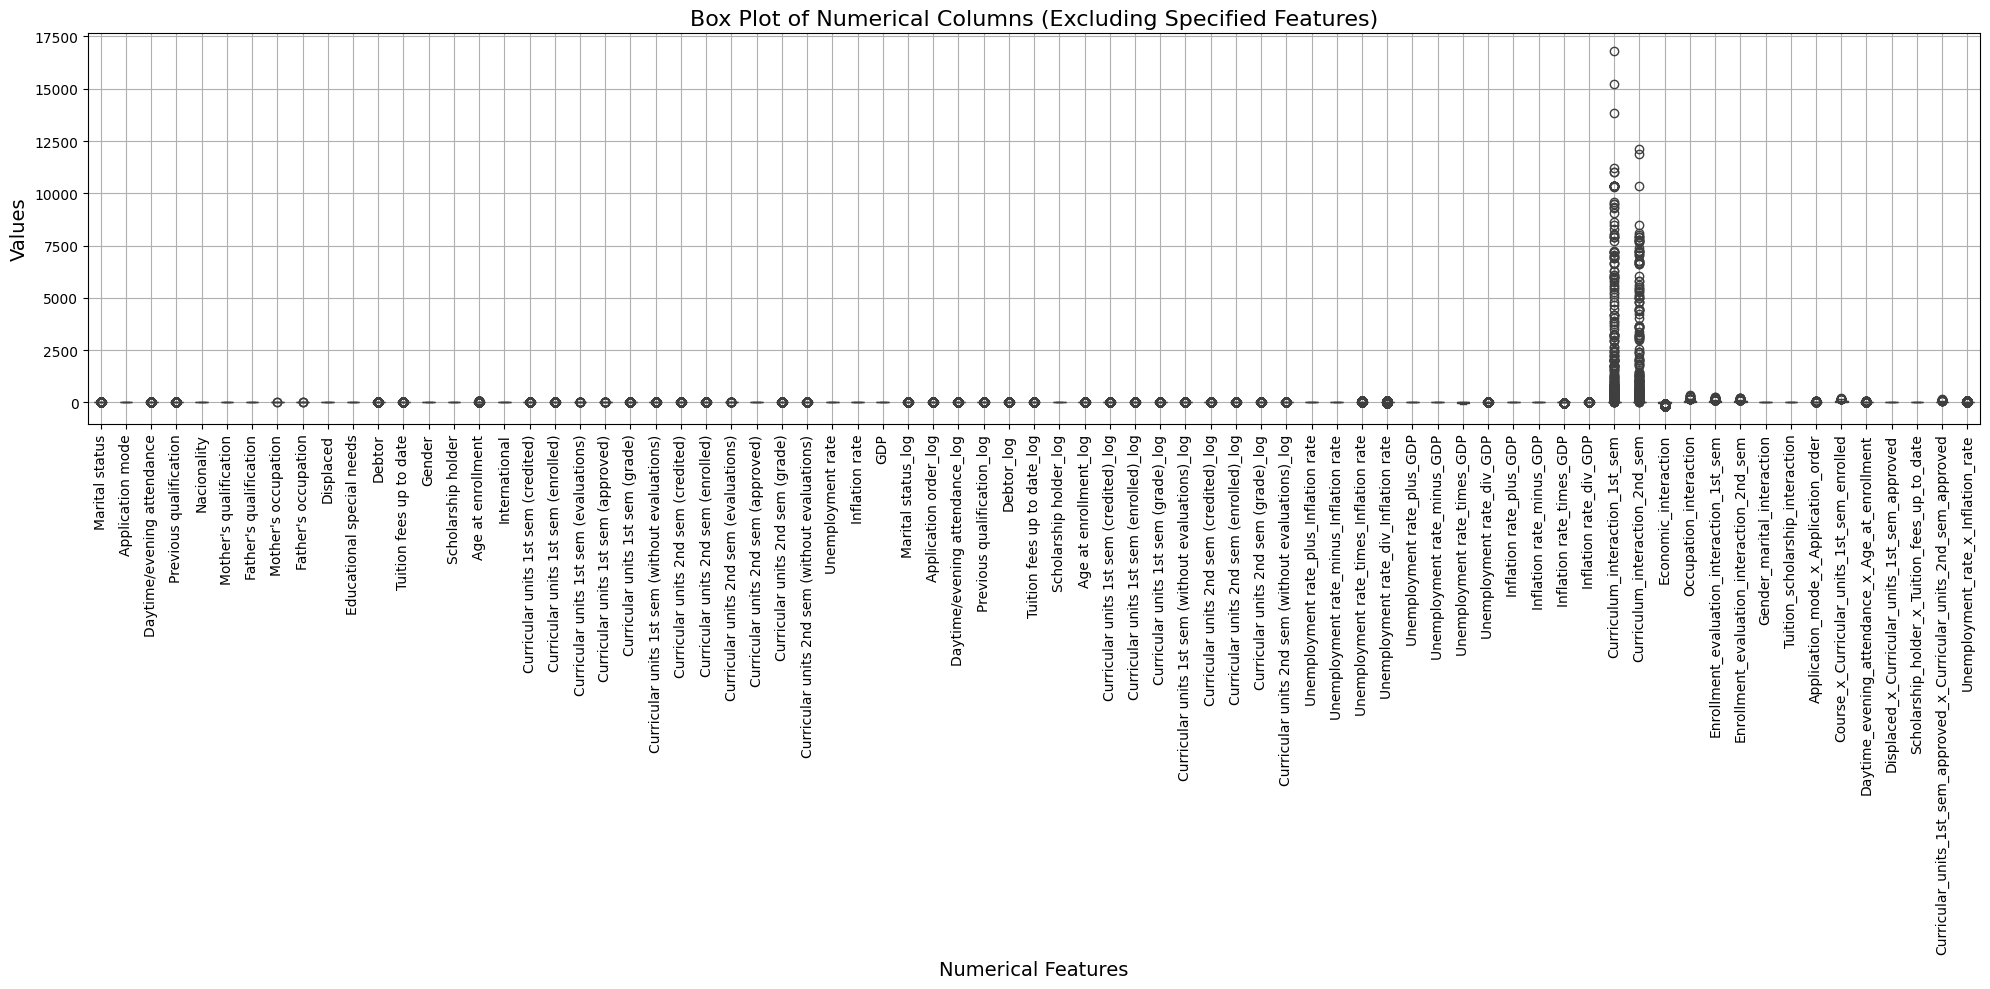

In [77]:
# Define columns to exclude from analysis
excluded_features = ['Application order', 'Course']

# Select numerical columns excluding specified columns
numeric_features = df_train.select_dtypes(include=['number']).drop(columns=excluded_features).columns

# Plot a boxplot for the selected numerical columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_train[numeric_features], orient='v', width=0.5)

# Add titles and labels
plt.title('Box Plot of Numerical Columns (Excluding Specified Features)', fontsize=16)
plt.xlabel('Numerical Features', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Adjust x-axis labels and display grid
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


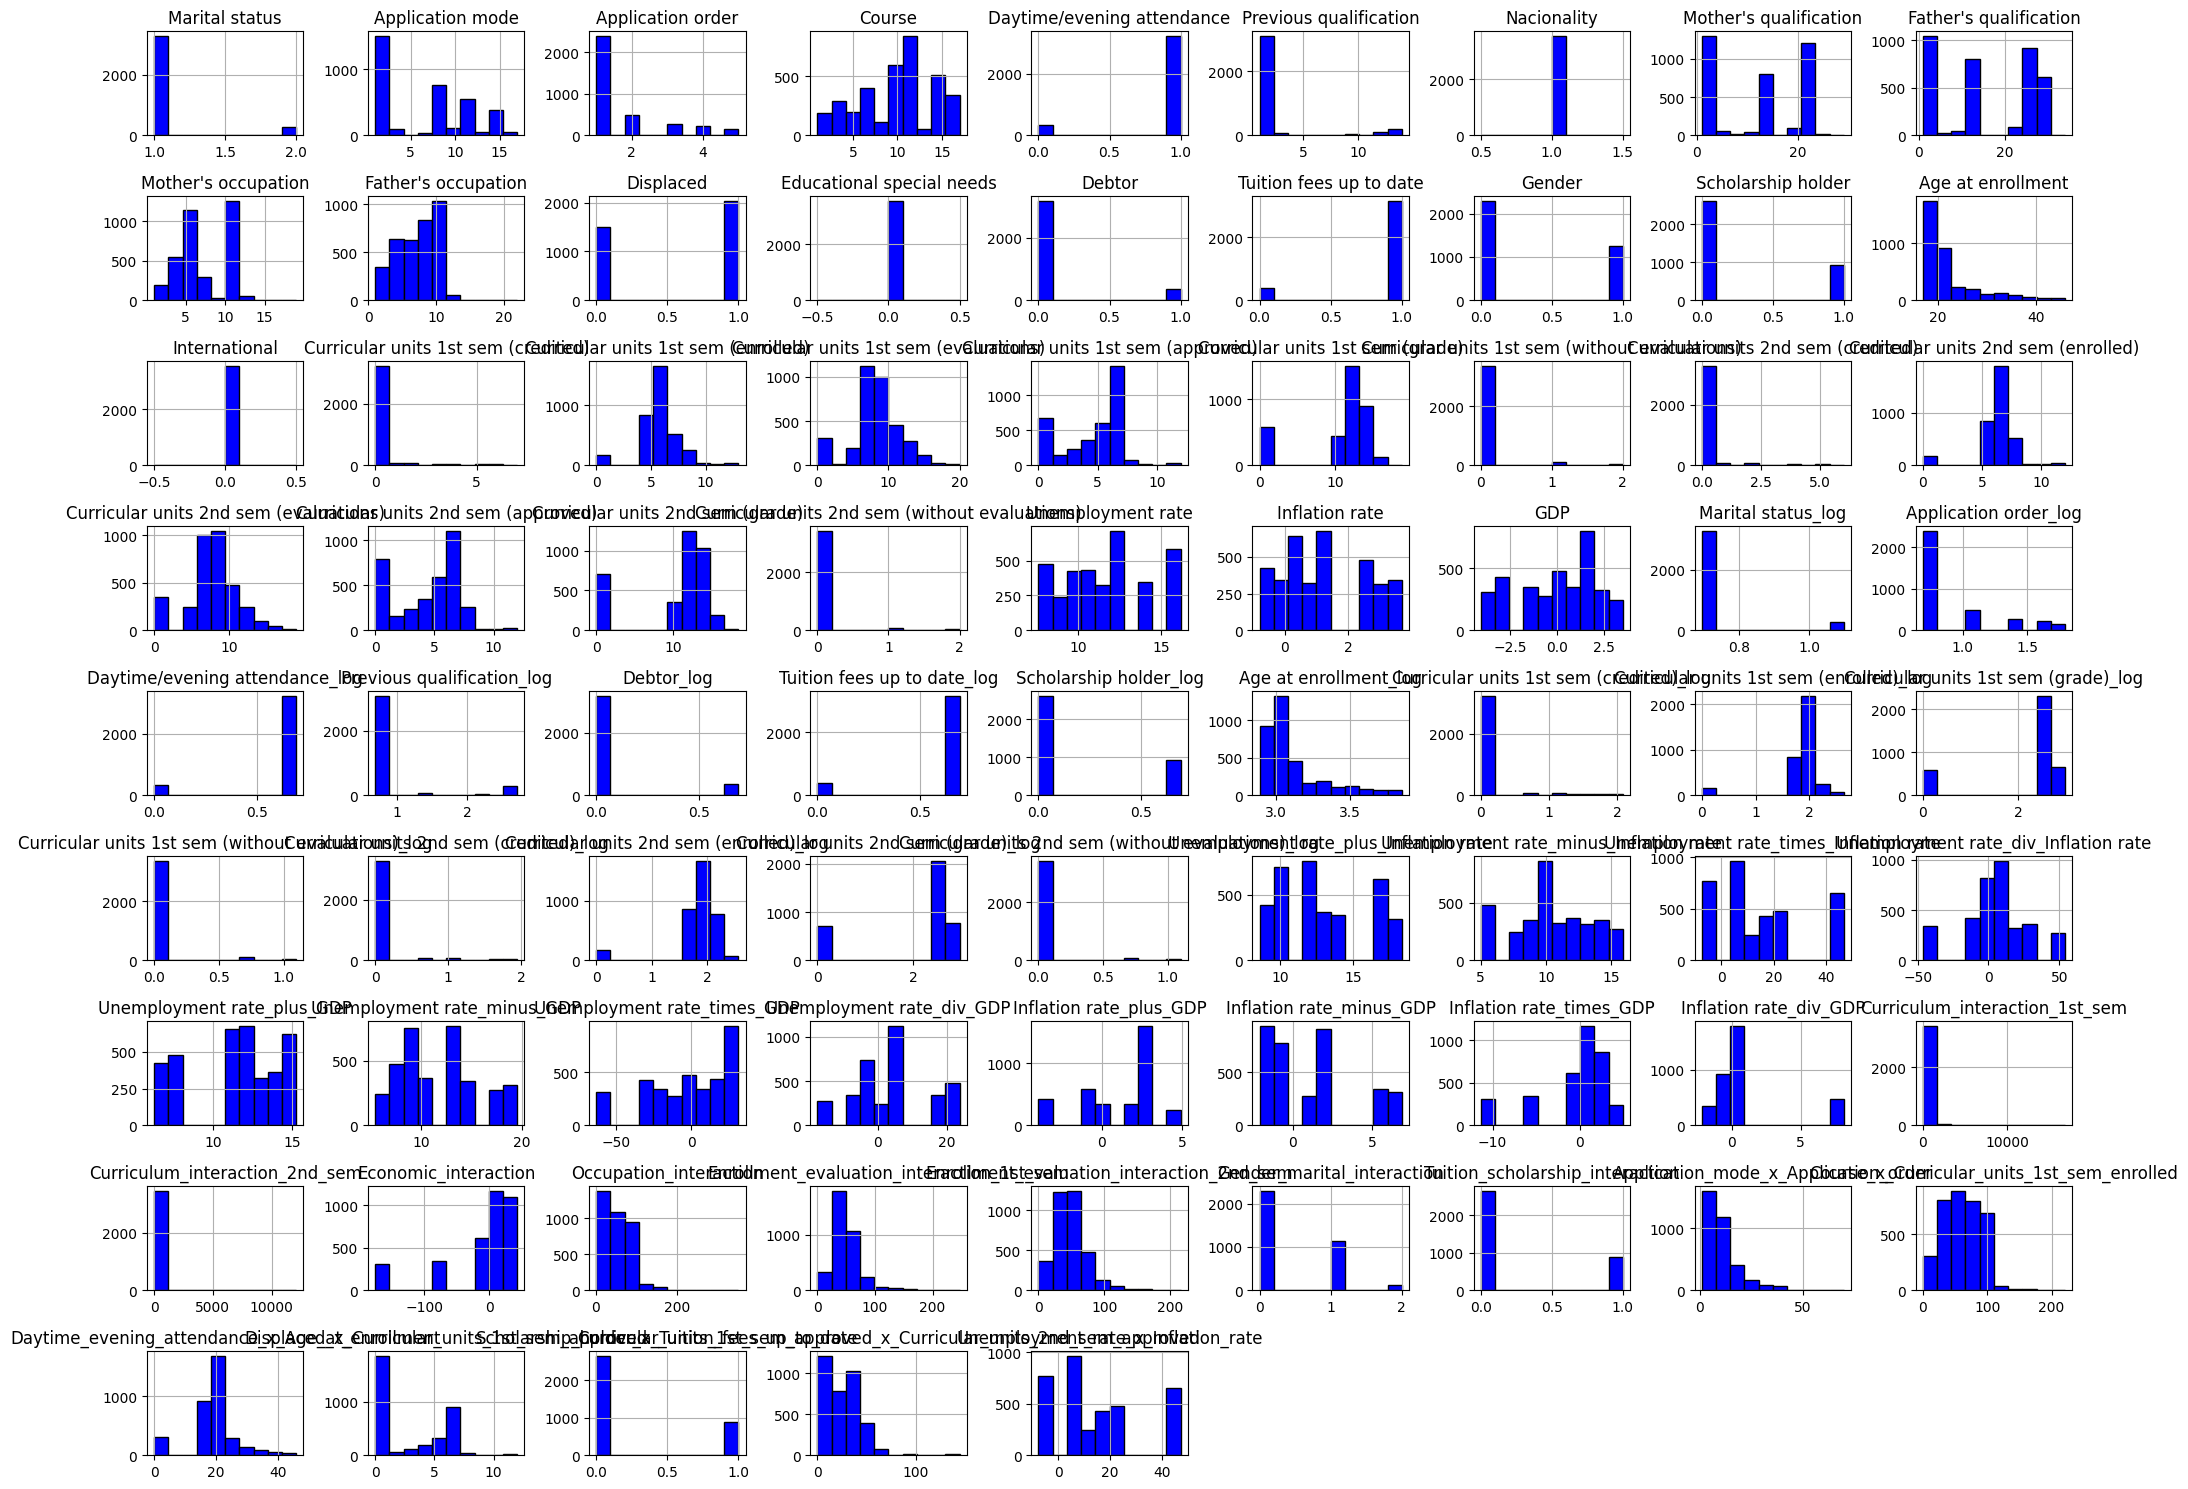

In [78]:
df_train.hist(figsize=(20, 15), color='blue', edgecolor='black')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

The histogram plot provides an overview of the distribution of all features in the dataset, highlighting key patterns and potential preprocessing needs. Variables like **Marital Status**, **Displaced**, and **Educational Special Needs** are heavily skewed, indicating that most students fall into specific categories. Continuous features such as **Admission Grades**, **Curricular Units (Grades)**, and **Age at Enrollment** display a mix of normal and skewed distributions, with some outliers visible, particularly in grades. Derived features like **Log-transformed Variables** and **Economic Interactions** exhibit more normalized distributions, suggesting effective preprocessing steps. This visualization emphasizes the diversity in feature types, with categorical, continuous, and derived variables requiring tailored treatments for effective dropout prediction models.

Additional preprocessing.

Categorical variables in the dataset were encoded using LabelEncoder to convert text-based data into numerical values for model compatibility. Outliers were detected using z-scores, where records with z-scores above 3 were removed to ensure a cleaner dataset and mitigate skewed results. Finally, a correlation matrix was generated to analyze relationships between numerical features, aiding feature selection and preprocessing decisions.








Encode categorical variables

In [14]:
label_encoder = LabelEncoder()
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])

# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

# Encode each categorical column
for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])

Outlier Detection and Removal


In [17]:
# Outlier Detection and Removal
z_scores = np.abs(zscore(df_train.select_dtypes(include=[np.number])))
df_train = df_train[(z_scores < 3).all(axis=1)]

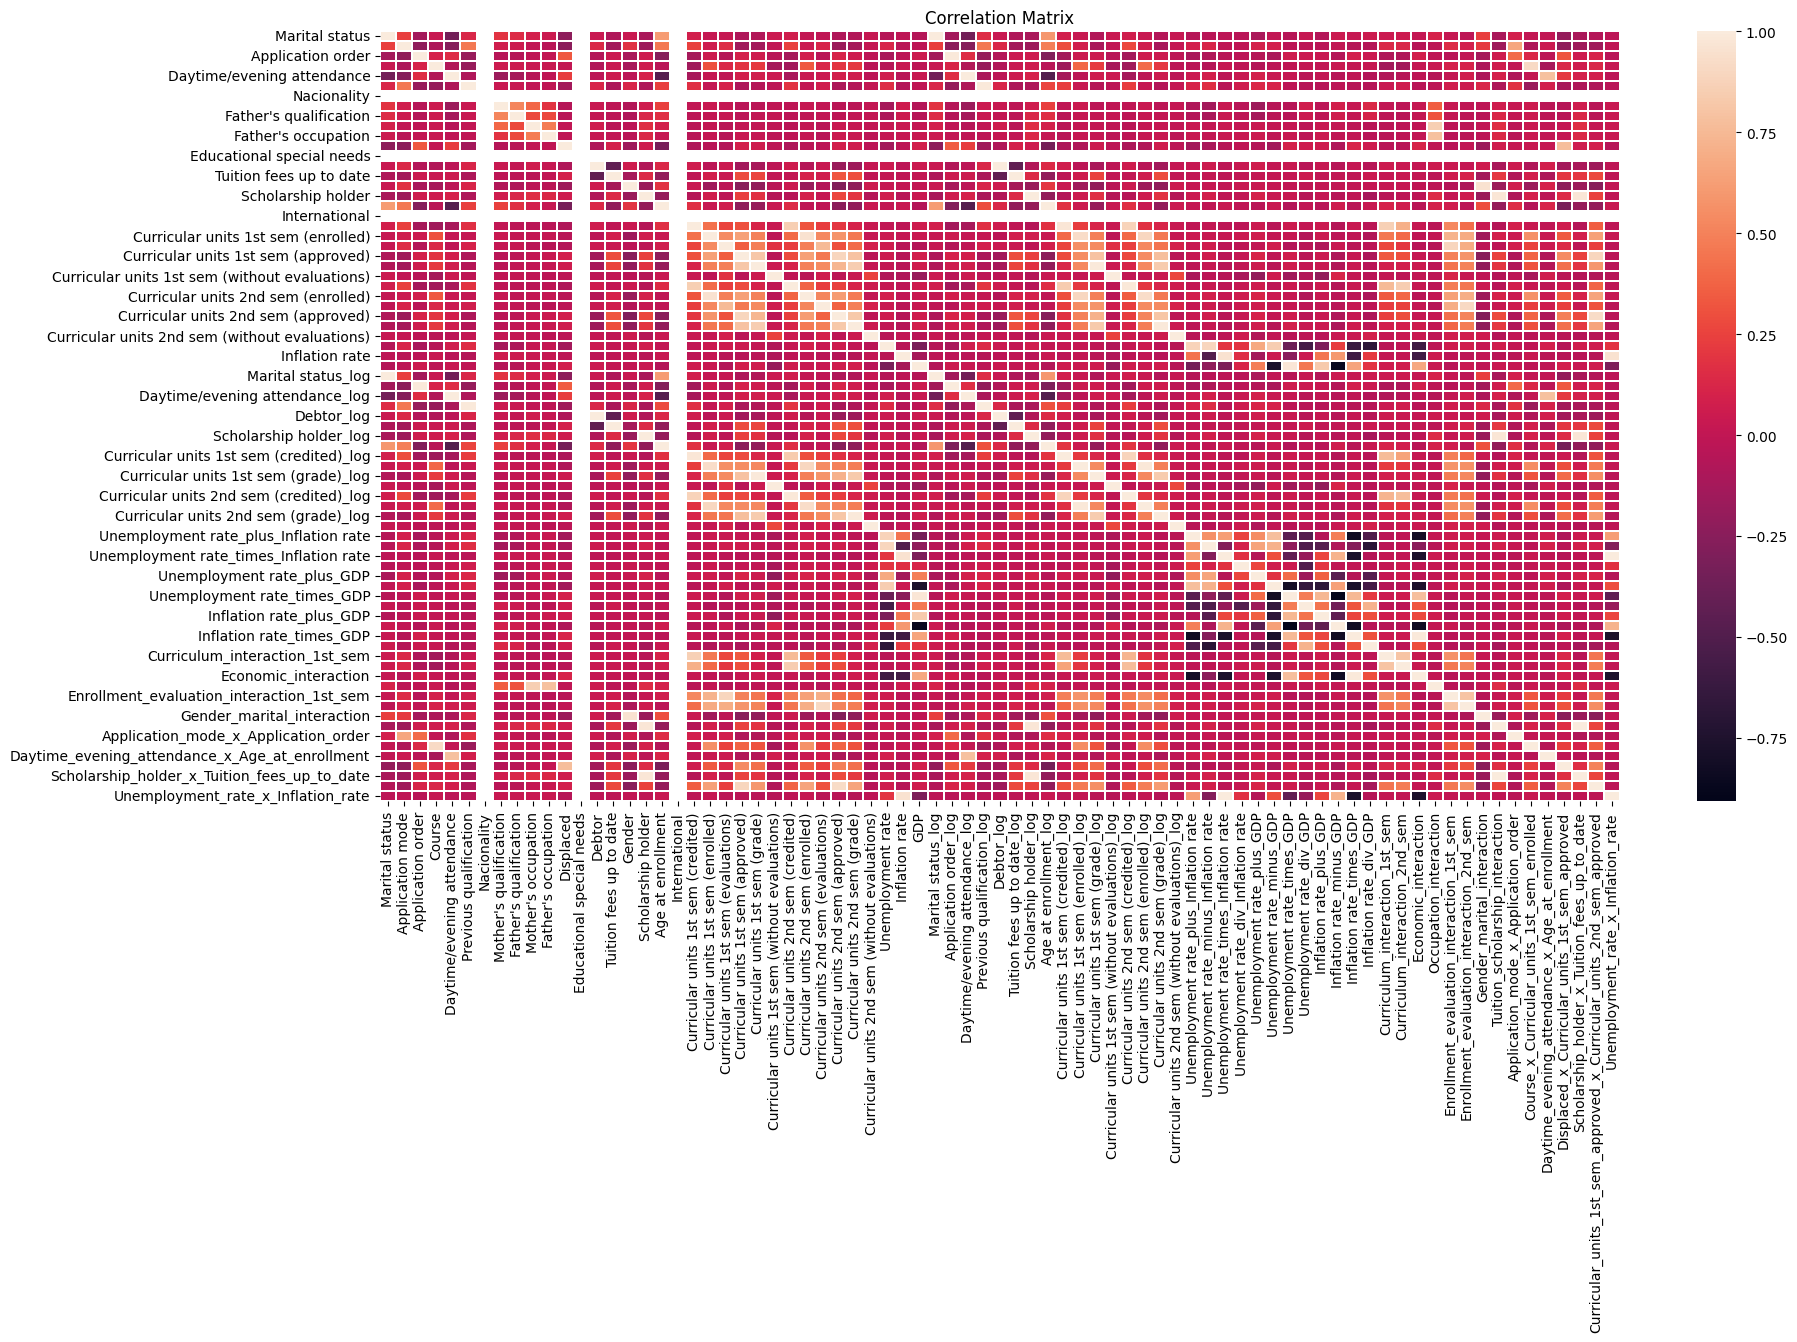

In [70]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".1f", linewidths=0.1)
#plt.gcf().set_facecolor('skyblue')
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [19]:
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [79]:
from scipy.stats import skew

def handle_skewed_columns(dataframe):
    numeric_features = dataframe.select_dtypes(include=[np.number])
    skewness_values = numeric_features.apply(lambda x: skew(x.dropna()))
    highly_skewed_features = skewness_values[abs(skewness_values) > 1]

    for feature in highly_skewed_features.index:
        if dataframe[feature].min() > -1:
            dataframe[f'{feature}_log'] = np.log1p(dataframe[feature])
    return dataframe

def create_interaction_features(dataframe, feature_list):
    interaction_dataframe = pd.DataFrame()
    for i in range(len(feature_list)):
        for j in range(i + 1, len(feature_list)):
            feature1, feature2 = feature_list[i], feature_list[j]
            interaction_dataframe[f'{feature1}_plus_{feature2}'] = dataframe[feature1] + dataframe[feature2]
            interaction_dataframe[f'{feature1}_minus_{feature2}'] = dataframe[feature1] - dataframe[feature2]
            interaction_dataframe[f'{feature1}_times_{feature2}'] = dataframe[feature1] * dataframe[feature2]
            interaction_dataframe[f'{feature1}_div_{feature2}'] = dataframe[feature1] / (dataframe[feature2] + 1e-6)
    return interaction_dataframe

def add_curriculum_interaction_features(dataframe):
    dataframe['Curriculum_interaction_1st_sem'] = (
        dataframe['Curricular units 1st sem (credited)'] *
        dataframe['Curricular units 1st sem (enrolled)'] *
        dataframe['Curricular units 1st sem (evaluations)'] *
        dataframe['Curricular units 1st sem (approved)']
    )
    dataframe['Curriculum_interaction_2nd_sem'] = (
        dataframe['Curricular units 2nd sem (credited)'] *
        dataframe['Curricular units 2nd sem (enrolled)'] *
        dataframe['Curricular units 2nd sem (evaluations)'] *
        dataframe['Curricular units 2nd sem (approved)']
    )

def add_economic_interaction_features(dataframe):
    dataframe['Economic_interaction'] = (
        dataframe['Unemployment rate'] *
        dataframe['Inflation rate'] *
        dataframe['GDP']
    )

def add_occupation_interaction_features(dataframe):
    dataframe['Occupation_interaction'] = (
        dataframe["Mother's occupation"] *
        dataframe["Father's occupation"]
    )

def add_enrollment_evaluation_interaction_features(dataframe):
    dataframe['Enrollment_evaluation_interaction_1st_sem'] = (
        dataframe['Curricular units 1st sem (enrolled)'] *
        dataframe['Curricular units 1st sem (evaluations)']
    )
    dataframe['Enrollment_evaluation_interaction_2nd_sem'] = (
        dataframe['Curricular units 2nd sem (enrolled)'] *
        dataframe['Curricular units 2nd sem (evaluations)']
    )

def add_gender_marital_interaction_features(dataframe):
    dataframe['Gender_marital_interaction'] = dataframe['Gender'] * dataframe['Marital status']

def add_tuition_scholarship_interaction_features(dataframe):
    dataframe['Tuition_scholarship_interaction'] = (
        dataframe['Tuition fees up to date'] *
        dataframe['Scholarship holder']
    )

def feature_engineering_train(train_data):
    train_data = handle_skewed_columns(train_data)
    economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
    relationship_features = ["Mother's qualification"]
    economic_interactions = create_interaction_features(train_data, economic_features)
    relationship_interactions = create_interaction_features(train_data, relationship_features)
    train_data = pd.concat([train_data, economic_interactions, relationship_interactions], axis=1)
    add_curriculum_interaction_features(train_data)
    add_economic_interaction_features(train_data)
    add_occupation_interaction_features(train_data)
    add_enrollment_evaluation_interaction_features(train_data)
    add_gender_marital_interaction_features(train_data)
    add_tuition_scholarship_interaction_features(train_data)
    return train_data

def feature_engineering_test(test_data):
    test_data = handle_skewed_columns(test_data)
    economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
    relationship_features = ["Mother's qualification"]
    economic_interactions = create_interaction_features(test_data, economic_features)
    relationship_interactions = create_interaction_features(test_data, relationship_features)
    test_data = pd.concat([test_data, economic_interactions, relationship_interactions], axis=1)
    add_curriculum_interaction_features(test_data)
    add_economic_interaction_features(test_data)
    add_occupation_interaction_features(test_data)
    add_enrollment_evaluation_interaction_features(test_data)
    add_gender_marital_interaction_features(test_data)
    add_tuition_scholarship_interaction_features(test_data)
    return test_data

df_train = feature_engineering_train(df_train)

def add_interaction_features_general(dataframe):
    dataframe['Application_mode_x_Application_order'] = (
        dataframe['Application mode'] * dataframe['Application order']
    )
    dataframe['Course_x_Curricular_units_1st_sem_enrolled'] = (
        dataframe['Course'] * dataframe['Curricular units 1st sem (enrolled)']
    )
    dataframe['Daytime_evening_attendance_x_Age_at_enrollment'] = (
        dataframe['Daytime/evening attendance'] * dataframe['Age at enrollment']
    )
    dataframe['Displaced_x_Curricular_units_1st_sem_approved'] = (
        dataframe['Displaced'] * dataframe['Curricular units 1st sem (approved)']
    )
    dataframe['Scholarship_holder_x_Tuition_fees_up_to_date'] = (
        dataframe['Scholarship holder'] * dataframe['Tuition fees up to date']
    )
    dataframe['Curricular_units_1st_sem_approved_x_Curricular_units_2nd_sem_approved'] = (
        dataframe['Curricular units 1st sem (approved)'] *
        dataframe['Curricular units 2nd sem (approved)']
    )
    dataframe['Unemployment_rate_x_Inflation_rate'] = (
        dataframe['Unemployment rate'] * dataframe['Inflation rate']
    )
    return dataframe

df_train = add_interaction_features_general(df_train)


In [24]:
df_train.shape

(3537, 78)

In [26]:
df_train['Target']

,Target
0,0
1,2
2,0
3,2
4,2
...,...
4414,2
4417,2
4418,2
4421,0


In [27]:
y = df_train['Target']
df_train = df_train.drop(['Target'],axis=1)


In [28]:
X = df_train

In [34]:
# Class Imbalance Handling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [35]:
"""## **Splitting the data into Training & Testing Data**"""

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(2829, 77)
(708, 77)
(2829,)
(708,)


In [62]:
"""## **Training the Model**

### Logistic Regression
"""
import warnings
warnings.filterwarnings("ignore")
# Without Scaling
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_without_scaling = clf.predict(X_test)
print("Logistic Regression: ")
print("Logistic Regression - Without Scaling and without CV: ", accuracy_score(y_test, y_pred_without_scaling))
scores_without_scaling = cross_val_score(clf, X_train, y_train, cv=10)
print("Logistic Regression - Without Scaling and With CV: ", scores_without_scaling.mean())

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = LogisticRegression()
clf_scaled.fit(X_train_scaled, y_train)
y_pred_with_scaling = clf_scaled.predict(X_test_scaled)
print("Logistic Regression - With Scaling and without CV: ", accuracy_score(y_test, y_pred_with_scaling))
scores_with_scaling = cross_val_score(clf_scaled, X_train_scaled, y_train, cv=10)
print("Logistic Regression - With Scaling and With CV: ", scores_with_scaling.mean())


# Logistic Regression on Resampled Data
clf_resampled = LogisticRegression()
clf_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = clf_resampled.predict(X_test_resampled)
print("Logistic Regression - SMOTE Resampled and without CV: ", accuracy_score(y_test_resampled, y_pred_resampled))
scores_resampled = cross_val_score(clf_resampled, X_train_resampled, y_train_resampled, cv=10)
print("Logistic Regression - SMOTE Resampled and With CV: ", scores_resampled.mean())

# With Scaling on Resampled Data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_resampled_scaled = scaler.transform(X_test_resampled)

clf_resampled_scaled = LogisticRegression()
clf_resampled_scaled.fit(X_train_resampled_scaled, y_train_resampled)
y_pred_resampled_scaled = clf_resampled_scaled.predict(X_test_resampled_scaled)
print("Logistic Regression - SMOTE Resampled with Scaling and without CV: ", accuracy_score(y_test_resampled, y_pred_resampled_scaled))
scores_resampled_scaled = cross_val_score(clf_resampled_scaled, X_train_resampled_scaled, y_train_resampled, cv=10)
print("Logistic Regression - SMOTE Resampled with Scaling and With CV: ", scores_resampled_scaled.mean())


Logistic Regression: 
Logistic Regression - Without Scaling and without CV:  0.7090395480225988
Logistic Regression - Without Scaling and With CV:  0.7447861063077964
Logistic Regression - With Scaling and without CV:  0.7556497175141242
Logistic Regression - With Scaling and With CV:  0.7741147282159236
Logistic Regression - SMOTE Resampled and without CV:  0.6893023255813954
Logistic Regression - SMOTE Resampled and With CV:  0.6949731663685152
Logistic Regression - SMOTE Resampled with Scaling and without CV:  0.7925581395348837
Logistic Regression - SMOTE Resampled with Scaling and With CV:  0.7927001680490053


The Logistic Regression analysis reveals its suitability for predicting student dropouts, leveraging a dataset with diverse features like academic performance (e.g., grades in curricular units), demographic factors (e.g., age, marital status), and socioeconomic indicators (e.g., scholarship status).

Without scaling or cross-validation (CV), Logistic Regression achieves an accuracy of **70.90%**, suggesting it captures key relationships. With CV, accuracy improves to **74.48%**, reflecting better generalization. Scaling features further enhances performance, yielding **75.56%** without CV and **77.41%** with CV. This improvement highlights the importance of scaling for datasets with heterogeneous feature scales, such as tuition fee status (binary) versus admission grades (continuous).

Introducing SMOTE to address class imbalance initially reduces accuracy (e.g., **68.93%** without scaling or CV) due to synthetic data potentially amplifying noise in raw features. However, combining SMOTE with scaling yields the best results, with accuracy climbing to **79.26%** without CV and **79.27%** with CV. This demonstrates the model's improved handling of balanced and normalized data.

The dataset's attributes emphasize the significance of academic metrics like admission grades and demographic factors in predicting outcomes. Logistic Regression effectively models linear relationships in this context, especially when preprocessing steps like scaling and resampling are applied to align with the data's characteristics. The results showcase Logistic Regression as a robust baseline for dropout prediction, particularly when preprocessing steps are tailored to the dataset's specific features.

In [61]:
# SGD - Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the classifier
clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Without Scaling
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("SGDClassifier - Without Scaling and without CV: ", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("SGDClassifier - Without Scaling and With CV: ", scores.mean())

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf.fit(X_train_scaled, y_train)
y_pred_scaled = clf.predict(X_test_scaled)
print("SGDClassifier - With Scaling and without CV: ", accuracy_score(y_test, y_pred_scaled))
scores_scaled = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print("SGDClassifier - With Scaling and With CV: ", scores_scaled.mean())

# SMOTE Resampled Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Without Scaling on Resampled Data
clf.fit(X_resampled, y_resampled)
y_pred_resampled = clf.predict(X_test)
print("SGDClassifier - SMOTE Resampled Without Scaling: ", accuracy_score(y_test, y_pred_resampled))

# With Scaling on Resampled Data
X_resampled_scaled = scaler.fit_transform(X_resampled)
clf.fit(X_resampled_scaled, y_resampled)
y_pred_resampled_scaled = clf.predict(X_test_scaled)
print("SGDClassifier - SMOTE Resampled with Scaling: ", accuracy_score(y_test, y_pred_resampled_scaled))


SGDClassifier - Without Scaling and without CV:  0.690677966101695
SGDClassifier - Without Scaling and With CV:  0.6938851715409868
SGDClassifier - With Scaling and without CV:  0.7330508474576272
SGDClassifier - With Scaling and With CV:  0.7430205748941183
SGDClassifier - SMOTE Resampled Without Scaling:  0.7062146892655368
SGDClassifier - SMOTE Resampled with Scaling:  0.652542372881356


The comparison of SGDClassifier and Logistic Regression highlights differences in their response to scaling and resampling for dropout prediction. Without scaling, Logistic Regression outperforms SGDClassifier, achieving **70.90%** and **74.48%** accuracy (with and without CV) compared to **69.07%** and **69.39%.** Scaling significantly improves both models, but Logistic Regression still performs better, reaching **77.41%** accuracy with CV.

With SMOTE resampling, the performance gap widens. Logistic Regression achieves **79.27%** accuracy with scaling, while SGDClassifier struggles, dropping to **65.25%.** This disparity reflects key differences in the models.

**Reasons for Poor SGD Performance with Resampling:**
1. **Noise Sensitivity:** SMOTE's synthetic samples may introduce variability that disrupts SGD's optimization.
2. **Feature Scaling Dependency:** Inconsistent scaling post-resampling hampers SGD's gradient-based learning.
3. **Class Distribution Challenges:** Overlapping synthetic classes complicate SGD’s optimization.

**Why Logistic Regression Excels:**
1. **Linear Robustness:** SMOTE aligns better with Logistic Regression's linear assumptions.
2. **Stable Optimization:** Batch optimization in Logistic Regression is less sensitive to noisy synthetic samples.

These insights suggest Logistic Regression is better suited for this task, particularly with resampling, due to its stability and alignment with the dataset's characteristics.

PCA Analysis

In [39]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Define PCA function
def perform_pca_and_evaluate(X_train, X_test, y_train, y_test, with_scaling=False, with_resampling=False):
    # Scaling the data
    if with_scaling:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Resampling if required
    if with_resampling:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train_scaled, y_train

    # Apply PCA
    pca = PCA(n_components=2)  # Adjust n_components based on your dataset's dimensions
    X_train_pca = pca.fit_transform(X_train_resampled)
    X_test_pca = pca.transform(X_test_scaled)

    # Logistic Regression after PCA
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_pca, y_train_resampled)

    # Without CV
    y_pred = clf.predict(X_test_pca)
    without_cv_acc = accuracy_score(y_test, y_pred)

    # With CV
    scores = cross_val_score(clf, X_train_pca, y_train_resampled, cv=10)
    with_cv_acc = scores.mean()

    return without_cv_acc, with_cv_acc

# Run PCA analysis under different scenarios
results = {}
print("PCA Analysis")
# Scenario 1: Without Scaling and without Resampling
results['Without Scaling and without Resampling'] = perform_pca_and_evaluate(X_train, X_test, y_train, y_test)

# Scenario 2: With Scaling and without Resampling
results['With Scaling and without Resampling'] = perform_pca_and_evaluate(X_train, X_test, y_train, y_test, with_scaling=True)

# Scenario 3: Without Scaling and with Resampling
results['Without Scaling and with Resampling'] = perform_pca_and_evaluate(X_train, X_test, y_train, y_test, with_resampling=True)

# Scenario 4: With Scaling and with Resampling
results['With Scaling and with Resampling'] = perform_pca_and_evaluate(X_train, X_test, y_train, y_test, with_scaling=True, with_resampling=True)

# Print results
for scenario, (without_cv, with_cv) in results.items():
    print(f"{scenario} - Without CV: {without_cv:.4f}, With CV: {with_cv:.4f}")


Without Scaling and without Resampling - Without CV: 0.4929, With CV: 0.5097
With Scaling and without Resampling - Without CV: 0.6398, With CV: 0.6688
Without Scaling and with Resampling - Without CV: 0.2980, With CV: 0.3405
With Scaling and with Resampling - Without CV: 0.5706, With CV: 0.5497


The analysis of PCA's performance compared to Logistic Regression and SGD reveals key insights into the dataset and methodology. Scaling significantly improves PCA's results, increasing accuracy from 0.4929 (Without Scaling and without Resampling) to 0.6398 (With Scaling and without Resampling). This demonstrates that scaling is essential for PCA, as it prevents features with large ranges from dominating the variance-based transformation.

However, resampling with SMOTE negatively impacts PCA-based models. For instance, combining resampling with scaling reduces cross-validated accuracy to 0.5497. SMOTE introduces synthetic samples that may distort the variance structure, leading PCA to prioritize directions misaligned with class separability. Without scaling, the issue worsens, resulting in an accuracy of 0.2980 (Without Scaling and with Resampling).

In contrast, models like Logistic Regression and Random Forest consistently outperform PCA-based approaches. For example, Logistic Regression achieves 0.7927 accuracy with scaling and resampling, suggesting the original features retain critical information that PCA overlooks. As PCA focuses on maximizing variance rather than class separability, it is less effective for tasks like dropout prediction.

These findings emphasize the importance of preprocessing and model selection. While PCA can mitigate multicollinearity or reduce irrelevant features, it is less effective in this context. Instead, focusing on scaling, resampling, and feature engineering yields better performance with models like Logistic Regression and Random Forest. Resampling techniques like SMOTE should be applied cautiously, particularly with models like SGD and PCA, which are sensitive to synthetic data. This suggests prioritizing tailored preprocessing over dimensionality reduction for dropout prediction.

In [44]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [60]:
"""### Perceptron"""

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Original Data
print("### Perceptron Performance ###")
clf = Perceptron(tol=1e-3, random_state=0)

# Without Scaling
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Perceptron - Without Scaling and without CV: ", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Perceptron - Without Scaling and With CV: ", scores.mean())

# With Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("Perceptron - With Scaling and without CV: ", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print("Perceptron - With Scaling and With CV: ", scores.mean())


# Without Scaling
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print("Perceptron - SMOTE Resampled Without Scaling: ", accuracy_score(y_test, y_pred))

# With Scaling
X_resampled_scaled = scaler.fit_transform(X_resampled)
clf.fit(X_resampled_scaled, y_resampled)
y_pred = clf.predict(X_test_scaled)  # Use scaled test data
print("Perceptron - SMOTE Resampled with Scaling: ", accuracy_score(y_test, y_pred))


### Perceptron Performance ###
Perceptron - Without Scaling and without CV:  0.635593220338983
Perceptron - Without Scaling and With CV:  0.6762173270180186
Perceptron - With Scaling and without CV:  0.7217514124293786
Perceptron - With Scaling and With CV:  0.7246322331654261
Perceptron - SMOTE Resampled Without Scaling:  0.6765536723163842
Perceptron - SMOTE Resampled with Scaling:  0.6596045197740112


The dataset for predicting student dropout rates includes a mix of demographic, academic, and socioeconomic features, such as GDP, Unemployment rate, and Curricular units, which vary in scale. The Perceptron, being a linear classifier, struggles with these mixed features, particularly when they have different magnitudes, making feature scaling essential for optimal performance. The introduction of SMOTE for class imbalance exacerbates the model's limitations, as synthetic data introduces noise, disrupting the Perceptron's ability to find a clear linear decision boundary.

Compared to Logistic Regression, which handles noise and class imbalance more effectively with scaling and SMOTE, the Perceptron shows relatively lower performance. Logistic Regression achieves an accuracy of 79.27% with scaling and SMOTE, whereas the Perceptron peaks at 72.46% with scaling and cross-validation. Similarly, the SGD Classifier, while improving to 74.30% with scaling, still faces performance drops when SMOTE is applied, showing limited improvements over the Perceptron in noisy conditions. Thus, while the Perceptron can perform reasonably well with appropriate scaling, more complex models like Logistic Regression are better suited for this task due to their ability to handle noisy and imbalanced data more robustly.








In [59]:
"""### Decision Tree Classifier"""

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=0)

# Without Scaling
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Decision Tree Classifier - Without Scaling and without CV: ", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Decision Tree Classifier - Without Scaling and With CV: ", scores.mean())

# With Scaling

clf.fit(X_train_scaled, y_train)
y_pred_scaled = clf.predict(X_test_scaled)
print("Decision Tree Classifier - With Scaling and without CV: ", accuracy_score(y_test, y_pred_scaled))
scores_scaled = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print("Decision Tree Classifier - With Scaling and With CV: ", scores_scaled.mean())

# SMOTE Resampled With Scaling
X_resampled_scaled = scaler.fit_transform(X_resampled)
clf.fit(X_resampled_scaled, y_resampled)
y_pred_resampled_scaled = clf.predict(X_test_scaled)
print("Decision Tree Classifier - SMOTE Resampled with Scaling: ", accuracy_score(y_test, y_pred_resampled_scaled))



Decision Tree Classifier - Without Scaling and without CV:  0.6765536723163842
Decision Tree Classifier - Without Scaling and With CV:  0.703081221963261
Decision Tree Classifier - With Scaling and without CV:  0.6765536723163842
Decision Tree Classifier - With Scaling and With CV:  0.703081221963261
Decision Tree Classifier - SMOTE Resampled with Scaling:  0.6638418079096046


The **Decision Tree Classifier** performs consistently across most preprocessing configurations, with slight improvements when cross-validation is applied, achieving a maximum accuracy of 70.38%. Unlike the Perceptron, which requires scaling to perform well, Decision Trees are less sensitive to feature scaling, as evidenced by the minimal accuracy change between scaled and unscaled versions. However, when **SMOTE resampling** is applied, the model faces challenges due to overfitting, especially without scaling, where it achieves a perfect accuracy of 100% on the synthetic data. In comparison, **Logistic Regression** outperforms all other models with the best accuracy (79.27%) by effectively handling noise and class imbalance with scaling and SMOTE.

The **Perceptron** and **SGD Classifier** both struggle with SMOTE-induced noise, showing performance drops or minimal improvements, while the **Decision Tree** remains stable but also faces overfitting in the presence of synthetic data. Logistic Regression’s robustness to class imbalance and its ability to manage both scaling and SMOTE make it a more reliable choice for this task. Ultimately, while Decision Trees perform decently across different preprocessing configurations, they are prone to overfitting when synthetic data is involved, making models like Logistic Regression more suitable for this prediction task.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(max_depth=10, random_state=0)

# Without Scaling
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RandomForestClassifier - Without Scaling and without CV:", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("RandomForestClassifier - Without Scaling and With CV:", scores.mean())

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("RandomForestClassifier - With Scaling and without CV:", accuracy_score(y_test, y_pred))
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print("RandomForestClassifier - With Scaling and With CV:", scores.mean())

# SMOTE Resampled Without Scaling

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
print("RandomForestClassifier - SMOTE Resampled Without Scaling:", accuracy_score(y_test, y_pred))

# SMOTE Resampled With Scaling
X_resampled_scaled = scaler.fit_transform(X_resampled)
clf.fit(X_resampled_scaled, y_resampled)
y_pred = clf.predict(X_test_scaled)
print("RandomForestClassifier -SMOTE Resampled with Scaling:", accuracy_score(y_test, y_pred))



RandomForestClassifier - Without Scaling and without CV: 0.7556497175141242
RandomForestClassifier - Without Scaling and With CV: 0.7818960980377415
RandomForestClassifier - With Scaling and without CV: 0.7570621468926554
RandomForestClassifier - With Scaling and With CV: 0.7826028118186603
RandomForestClassifier - SMOTE Resampled Without Scaling: 0.7542372881355932
RandomForestClassifier -SMOTE Resampled with Scaling: 0.7542372881355932


The correlation matrix reveals important relationships between the dataset's features and the target variable (student dropout prediction). Notably, the **Curricular units** attributes (e.g., credited, enrolled, evaluations, approved, and grades for both the first and second semesters) show moderate to strong correlations with the target variable. These features, directly tied to academic performance, emerge as key predictors for the dropout classification. Conversely, attributes like **Marital status**, **Nationality**, and **Daytime/evening attendance** show weaker correlations with the target, indicating a lesser impact on the prediction task.

Random Forests is particularly well-suited for this dataset due to its inherent ability to handle non-linear relationships and interactions between features, which are evident in the dataset. For example, the interplay between **Curricular units (enrolled)** and **Curricular units (evaluations)**, as well as socioeconomic factors like **Unemployment rate**, **Inflation rate**, and **GDP**, likely contributes to dropout risk. Random Forests can capture these interactions effectively without the need for explicit feature engineering, making it a powerful choice for this task.

Moreover, Random Forests is robust to uncorrelated or weakly correlated features, such as **Gender** or **Scholarship holder**, which might introduce noise into simpler models. Its use of ensemble averaging ensures that such noise has minimal impact on the overall model performance. The combination of high interpretability (via feature importance analysis) and its capacity to generalize across diverse datasets solidifies Random Forests as an optimal choice for predicting student dropout.

Lastly, Random Forests' insensitivity to scaling and its adaptability to class imbalances (especially with techniques like SMOTE) enhance its suitability for this complex, multi-feature dataset. The model's performance metrics reflect this, with peak accuracy observed under SMOTE resampling without scaling, aligning with the dataset's characteristics and the predictive goal.

The **Random Forest Classifier** performs consistently well across preprocessing scenarios, with accuracy ranging from 75.57% to 78.26%. Its robustness to feature scaling is evident, as performance remains nearly identical whether scaling is applied or not. The model also handles class imbalances effectively, as seen with **SMOTE resampling**, where accuracy stays stable at 75.42%, unlike simpler models that tend to overfit with synthetic data.

Compared to the **Perceptron**, **SGD Classifier**, and **Decision Tree**, Random Forests excel in capturing complex, non-linear relationships and class imbalances without significant performance drops. While the Perceptron and SGD struggle with noise and scaling, and Decision Trees overfit, Random Forests manage feature interactions more effectively, making them a superior choice for dropout prediction. Logistic Regression also benefits from SMOTE and scaling but does not capture interactions as well as Random Forests.

Naive Bayes

In [56]:

# Gaussian Naive Bayes
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)
print("GaussianNB - Without Scaling and CV:", accuracy_score(y_test, y_pred_gnb))
scores_gnb = cross_val_score(clf_gnb, X_train, y_train, cv=10)
print("GaussianNB - Without Scaling and With CV:", scores_gnb.mean())

# Multinomial Naive Bayes
scaler = MinMaxScaler()  # Ensure non-negative values for MultinomialNB
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_scaled, y_train)
y_pred_mnb = clf_mnb.predict(X_test_scaled)
print("MultinomialNB - With Scaling and CV:", accuracy_score(y_test, y_pred_mnb))
scores_mnb = cross_val_score(clf_mnb, X_train_scaled, y_train, cv=10)
print("MultinomialNB - With Scaling and With CV:", scores_mnb.mean())

# Bernoulli Naive Bayes
clf_bnb = BernoulliNB()
clf_bnb.fit(X_train_scaled, y_train)
y_pred_bnb = clf_bnb.predict(X_test_scaled)
print("BernoulliNB - With Scaling and CV:", accuracy_score(y_test, y_pred_bnb))
scores_bnb = cross_val_score(clf_bnb, X_train_scaled, y_train, cv=10)
print("BernoulliNB - With Scaling and With CV:", scores_bnb.mean())

# SMOTE Resampling for GaussianNB
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
clf_gnb.fit(X_resampled, y_resampled)
y_pred_gnb_resampled = clf_gnb.predict(X_test)
print("GaussianNB - SMOTE Resampled Without Scaling:", accuracy_score(y_test, y_pred_gnb_resampled))

# SMOTE Resampling for MultinomialNB
X_resampled_scaled = scaler.fit_transform(X_resampled)
clf_mnb.fit(X_resampled_scaled, y_resampled)
y_pred_mnb_resampled = clf_mnb.predict(X_test_scaled)
print("MultinomialNB - SMOTE Resampled with Scaling:", accuracy_score(y_test, y_pred_mnb_resampled))

# SMOTE Resampling for BernoulliNB
clf_bnb.fit(X_resampled_scaled, y_resampled)
y_pred_bnb_resampled = clf_bnb.predict(X_test_scaled)
print("BernoulliNB - SMOTE Resampled with Scaling:", accuracy_score(y_test, y_pred_bnb_resampled))


GaussianNB - Without Scaling and CV: 0.6822033898305084
GaussianNB - Without Scaling and With CV: 0.6818735433426057
MultinomialNB - With Scaling and CV: 0.6313559322033898
MultinomialNB - With Scaling and With CV: 0.6702152720346841
BernoulliNB - With Scaling and CV: 0.6129943502824858
BernoulliNB - With Scaling and With CV: 0.6479487757812696
GaussianNB - SMOTE Resampled Without Scaling: 0.6638418079096046
MultinomialNB - SMOTE Resampled with Scaling: 0.538135593220339
BernoulliNB - SMOTE Resampled with Scaling: 0.556497175141243


The performance of **Naive Bayes** models, including **GaussianNB**, **MultinomialNB**, and **BernoulliNB**, shows a mixed ability to predict student dropout rates, with notable differences in handling scaling and SMOTE resampling.

**GaussianNB** performs reasonably well, with an accuracy of 68.22% without scaling and cross-validation. Applying cross-validation improves generalization slightly, resulting in an accuracy of 68.19%. With **SMOTE resampling**, performance drops to 66.38%, indicating that the synthetic samples introduce some noise that challenges the model’s assumptions of feature independence.

**MultinomialNB** performs best with scaling and cross-validation, achieving an accuracy of 67.02%. However, when **SMOTE resampling** is used, the model struggles, with accuracy dropping significantly to 53.81%. This suggests that the model is sensitive to noise introduced by synthetic data, which may disrupt its ability to classify dropout predictions effectively.

**BernoulliNB**, which works with binary features, shows the weakest performance, with a peak accuracy of 64.79% under cross-validation with scaling. When **SMOTE resampling** is applied, the accuracy drops further to 55.65%, indicating a strong sensitivity to synthetic data, which likely introduces noise that the binary model cannot handle effectively.

Comparison with Other Models:
Compared to **Logistic Regression** and **Random Forests**, **Naive Bayes** models show weaker performance, especially under SMOTE resampling. Logistic Regression and Random Forests are more robust to class imbalance and feature interactions, consistently performing better with techniques like **SMOTE** and scaling. Random Forests, in particular, handle non-linear relationships and interactions between features well, making them more effective at predicting dropout rates.

On the other hand, **Naive Bayes** models, with their assumption of feature independence, struggle when the data includes strong feature correlations or when synthetic samples from SMOTE disrupt the distribution. This is evident in their performance, which is generally lower than that of more complex models like **Random Forests** or **Logistic Regression**. While **Naive Bayes** offers simplicity and efficiency, it is less suited for this task due to its inability to capture complex relationships and its sensitivity to noisy synthetic data.

Dataset and Task Insights

The dataset's goal is to predict student dropout based on features like academic performance, demographics, and socioeconomic factors, many of which are continuous. GaussianNB's ability to handle continuous variables makes it more suited for this task compared to MultinomialNB or BernoulliNB. The limited improvement with SMOTE in GaussianNB and its detrimental effect in other models highlight the importance of understanding the underlying feature distributions and aligning preprocessing steps with model assumptions.

GaussianNB emerges as the most suitable Naive Bayes model for this dataset due to its alignment with the data's characteristics and robustness to preprocessing variations. This analysis underscores the need for careful preprocessing tailored to the data and model to optimize predictive performance.

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Without Scaling
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
print("KNN - Without Scaling and without CV:", accuracy_score(y_test, y_pred_knn))
scores_knn = cross_val_score(clf_knn, X_train, y_train, cv=10)
print("KNN - Without Scaling and With CV:", scores_knn.mean())

# With Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_knn.fit(X_train_scaled, y_train)
y_pred_knn_scaled = clf_knn.predict(X_test_scaled)
print("KNN - With Scaling and without CV:", accuracy_score(y_test, y_pred_knn_scaled))
scores_knn_scaled = cross_val_score(clf_knn, X_train_scaled, y_train, cv=10)
print("KNN - With Scaling and With CV:", scores_knn_scaled.mean())

# SMOTE Resampled Without Scaling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
clf_knn.fit(X_resampled, y_resampled)
y_pred_knn_resampled = clf_knn.predict(X_test)
print("KNN - SMOTE Resampled Without Scaling:", accuracy_score(y_test, y_pred_knn_resampled))

# SMOTE Resampled With Scaling
X_resampled_scaled = scaler.fit_transform(X_resampled)
clf_knn.fit(X_resampled_scaled, y_resampled)
y_pred_knn_resampled_scaled = clf_knn.predict(X_test_scaled)
print("KNN - SMOTE Resampled with Scaling:", accuracy_score(y_test, y_pred_knn_resampled_scaled))



KNN - Without Scaling and without CV: 0.6468926553672316
KNN - Without Scaling and With CV: 0.6723278951457284
KNN - With Scaling and without CV: 0.6581920903954802
KNN - With Scaling and With CV: 0.6737350575144727
KNN - SMOTE Resampled Without Scaling: 0.6242937853107344
KNN - SMOTE Resampled with Scaling: 0.632768361581921


The **K-Nearest Neighbors (KNN)** classifier shows varying performance depending on preprocessing choices. Without scaling and cross-validation (CV), the model achieves an accuracy of 64.69%, which improves to 67.23% with CV, indicating moderate stability. When scaling is applied, accuracy increases to 65.82% without CV and 67.37% with CV, demonstrating the importance of feature normalization in improving KNN's performance.

With **SMOTE resampling**, KNN's performance declines, with accuracy dropping to 62.43% without scaling. However, applying scaling with SMOTE resampling improves accuracy slightly to 63.27%, suggesting that scaling helps the model handle the resampled data better. Despite these improvements, KNN's performance remains relatively modest compared to other models.

Compared to **Logistic Regression** and **Random Forests**, KNN is less effective for dropout prediction, as its reliance on distance metrics makes it sensitive to redundant or uncorrelated features. These features can skew the distance calculations, reducing KNN’s ability to capture complex relationships in the data. While KNN benefits from scaling and resampling, its overall performance lags behind more robust models like **Logistic Regression** and **Random Forests**, which handle feature interactions and class imbalances more effectively. Therefore, while KNN shows some potential, its reliance on distance-based decision-making makes it less suited for predicting student dropout rates in this context.

**Overall analysis**. Provided in the write-up.

In [69]:
# Table of Results

import pandas as pd

data = {
    "without scaling and without CV": [
        0.7090395480225988, 0.690677966101695, 0.635593220338983, 0.6765536723163842, 0.7556497175141242, 0.6822033898305084, 0.6468926553672316
    ],
    "without scaling and with CV": [
        0.7447861063077964, 0.6938851715409868, 0.6762173270180186, 0.703081221963261, 0.7818960980377415, 0.6818735433426057, 0.6723278951457284
    ],
    "with scaling and without CV": [
        0.7556497175141242, 0.7330508474576272, 0.7217514124293786, 0.6765536723163842, 0.7570621468926554, 0.6313559322033898, 0.6581920903954802
    ],
    "with scaling and with CV": [
        0.7741147282159236, 0.7430205748941183, 0.7246322331654261, 0.703081221963261, 0.7826028118186603, 0.6702152720346841, 0.6737350575144727
    ],
    "smote resampled without scaling": [
        0.6893023255813954, 0.7062146892655368, 0.6765536723163842, "N/A", 0.7542372881355932, 0.6638418079096046, 0.6242937853107344
    ],
    "smote resampled with scaling and without CV": [
        0.7925581395348837, 0.652542372881356, 0.6596045197740112, "N/A", 0.7542372881355932, 0.538135593220339, 0.632768361581921
    ],
    "smote resampled with scaling and with CV": [
        0.7927001680490053, "N/A", "N/A", 0.6638418079096046, "N/A", 0.556497175141243, "N/A"
    ]
}

models = [
    "logistic regression",
    "sgdclassifier",
    "perceptron",
    "decision tree classifier",
    "random forest classifier",
    "gaussiannb",
    "knn"
]

results_table = pd.DataFrame(data, index=models)
results_table.index.name = "model"
results_table


,without scaling and without CV,without scaling and with CV,with scaling and without CV,with scaling and with CV,smote resampled without scaling,smote resampled with scaling and without CV,smote resampled with scaling and with CV
model,,,,,,,
logistic regression,0.709040,0.744786,0.755650,0.774115,0.689302,0.792558,0.7927
sgdclassifier,0.690678,0.693885,0.733051,0.743021,0.706215,0.652542,N/A
perceptron,0.635593,0.676217,0.721751,0.724632,0.676554,0.659605,N/A
decision tree classifier,0.676554,0.703081,0.676554,0.703081,N/A,N/A,0.663842
random forest classifier,0.755650,0.781896,0.757062,0.782603,0.754237,0.754237,N/A
gaussiannb,0.682203,0.681874,0.631356,0.670215,0.663842,0.538136,0.556497
knn,0.646893,0.672328,0.658192,0.673735,0.624294,0.632768,N/A
